In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler

In [2]:
# load the data set
df = pd.read_csv('GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [3]:
comfortable_df = df[(df['feels_like_celsius'] >= 18) & (df['feels_like_celsius'] <= 24)]
comfortable_days_per_city = comfortable_df.groupby('location_name').size().reset_index(name='comfortable_days')
print(comfortable_days_per_city.sort_values(by='comfortable_days', ascending=False))

# save the sorted result to a CSV file
comfortable_days_per_city.sort_values(by='comfortable_days', ascending=False).to_csv('comfortable_days_per_city.csv', index=False)

        location_name  comfortable_days
4         Addis Ababa               250
134             Sanaa               222
14             Asmara               176
147       Tegucigalpa               174
130       San Ignacio               148
..                ...               ...
12               Apia                 1
5         Addis Abeba                 1
49               Dili                 1
2    'S Gravenstaffel                 1
115      Port Moresby                 1

[166 rows x 2 columns]


In [4]:
# load the saved CSV file
comfortable_days_per_city = pd.read_csv('comfortable_days_per_city.csv')

# select the loaction_name column, wind_kph column, humidity column, precip_mm column, temperature_celsius column and comfortable_days column
comfortable_days_per_city = comfortable_days_per_city[['location_name', 'comfortable_days']]
# merge the comfortable_days_per_city DataFrame with the original DataFrame to get the other columns
merged_df = pd.merge(df, comfortable_days_per_city, on='location_name', how='inner')
selected_columns = ['location_name', 'wind_kph', 'humidity', 'precip_mm', 'temperature_celsius', 'comfortable_days']
merged_df = merged_df[selected_columns]

# save the merged DataFrame to a CSV file
merged_df.to_csv('comfortable_days_per_city_with_details.csv', index=False)

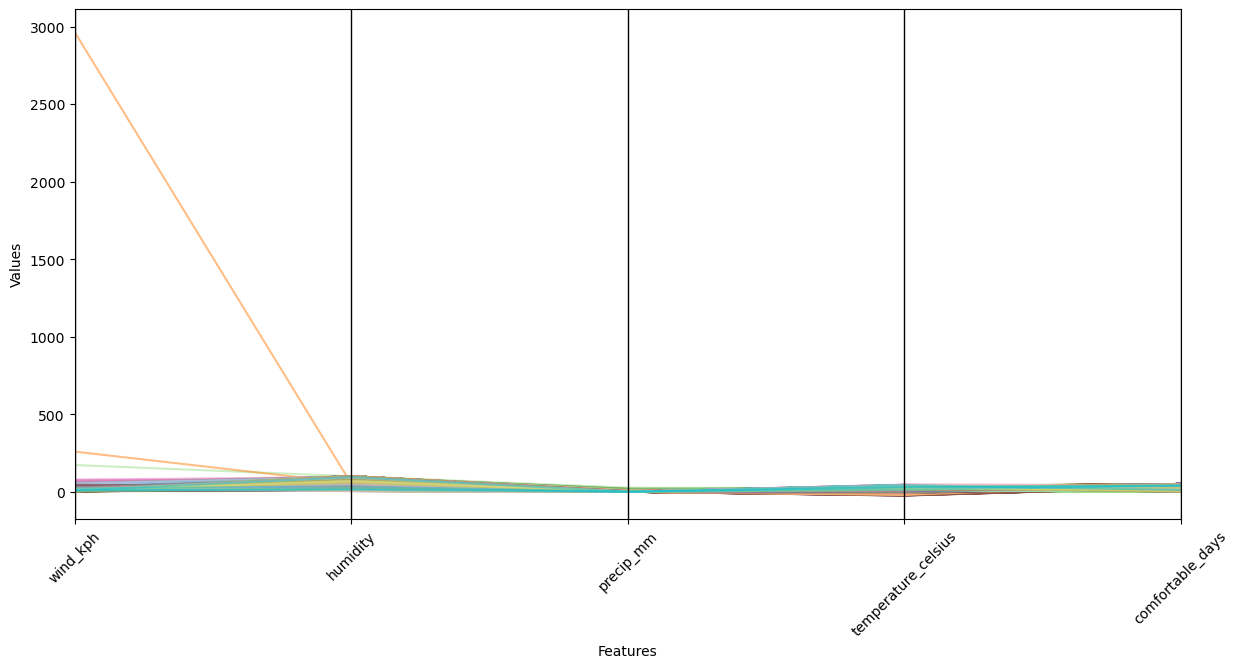

In [8]:
# load the merged DataFrame
merged_df = pd.read_csv('comfortable_days_per_city_with_details.csv')

merged_df_1 = merged_df[merged_df['comfortable_days'] <= 50]

plt.figure(figsize=(12, 6))
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
parallel_coordinates(merged_df_1, 'location_name', colormap=plt.get_cmap('tab20', 248), alpha=0.5)
plt.legend([], [], frameon=False)
plt.show()

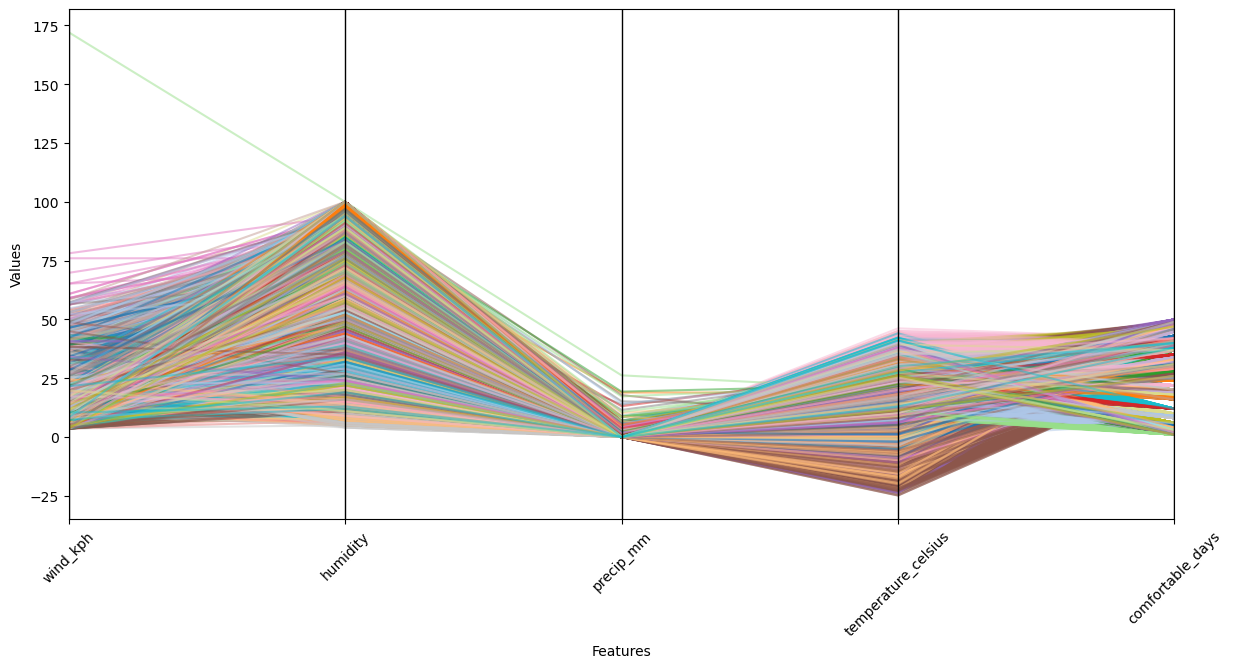

In [9]:
merged_df_2 = merged_df_1[merged_df_1['wind_kph'] < 200]

plt.figure(figsize=(12, 6))
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
parallel_coordinates(merged_df_2, 'location_name', colormap=plt.get_cmap('tab20', 248), alpha=0.5)
plt.legend([], [], frameon=False)
plt.show()

In [10]:
# load the comfortable_days_per_city DataFrame
comfortable_days_per_city = pd.read_csv('comfortable_days_per_city.csv')

# select location_name, temperature_celsius, wind_degree, last_updated, feels_like_celsius columns of the bottom 10 cities with the least comfortable days
comfortable_days_per_city = comfortable_days_per_city.sort_values(by='comfortable_days', ascending=False)
bottom_10_cities = comfortable_days_per_city.tail(10)['location_name'].tolist()
bottom_10_cities_df = df[df['location_name'].isin(bottom_10_cities)][['location_name', 'temperature_celsius', 'wind_degree', 'last_updated', 'feels_like_celsius']].copy()

# save the bottom 10 city DataFrame to a CSV file
bottom_10_cities_df.to_csv('bottom_10_city.csv', index=False)